## 作業重點

使用 y = (x + 5)² 觀看調整學習率(Leanrning Rate)所造成的影響

## 作業目標

請嘗試使用不同的組合驗證 learning rate 對所需 iteration 的影響, 主要驗證 learning rate 對於 grandient 收斂的速度

## 參考資料

指數衰減(Exponential Decay):

    decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

自然指數衰減(Natural Exponential Decay):

    decayed_learning_rate = learning_rate * exp(-decay_rate * global_step)

逆時間衰減(Inverse Time Decay):

    decayed_learning_rate = learning_rate / (1 + decay_rate * global_step / decay_step)

多項式衰減(Polynomial Decay):

    global_step = min(global_step, decay_steps)
    decayed_learning_rate = (learning_rate - end_learning_rate) * (1 - global_step / decay_steps) ^ (power)
                            + end_learning_rate

[Tensorflow 中的 learning rate decay 奇技淫巧](https://zhuanlan.zhihu.com/p/32923584)

[機器/深度學習 - 基礎數學(二): 梯度下降法(Gradient Descent)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E6%95%B8%E5%AD%B8-%E4%BA%8C-%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95-gradient-descent-406e1fd001f)

[機器/深度學習 - 基礎數學(三): 梯度最佳解相關算法(Gradient Descent Optimization Algorithms)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E6%95%B8%E5%AD%B8-%E4%B8%89-%E6%A2%AF%E5%BA%A6%E6%9C%80%E4%BD%B3%E8%A7%A3%E7%9B%B8%E9%97%9C%E7%AE%97%E6%B3%95-gradient-descent-optimization-algorithms-b61ed1478bd7)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_iterator(init_x, dydx, max_iters=10000, tolerance=0.000001, learning_rate=0.01):
    prev_x, iters = init_x, {}
    for i in range(max_iters):
        print(f'Iteration {i}: x value is {prev_x:.6f}.')
        next_x, iters[i] = prev_x - learning_rate * dydx(prev_x), prev_x
        if abs(prev_x - next_x) > tolerance:
            prev_x = next_x
            continue
        break
    return np.array(list(iters.items()))

def gradient_descent_plot(iters):
    plt.figure(figsize=(12, 7,))
    plt.plot(iters[:, 0], iters[:, 1], 'o-', ms=2.0, color='black', linestyle='None')
    plt.xlabel('$iters$', fontsize=16)
    plt.ylabel('$x$', fontsize=16)
    plt.title('Gradient Descent')
    plt.grid()
    plt.show()

In [3]:
iters = gradient_descent_iterator(3, lambda x: 2 * (x + 5), learning_rate=0.1)

Iteration 0: x value is 3.000000.
Iteration 1: x value is 1.400000.
Iteration 2: x value is 0.120000.
Iteration 3: x value is -0.904000.
Iteration 4: x value is -1.723200.
Iteration 5: x value is -2.378560.
Iteration 6: x value is -2.902848.
Iteration 7: x value is -3.322278.
Iteration 8: x value is -3.657823.
Iteration 9: x value is -3.926258.
Iteration 10: x value is -4.141007.
Iteration 11: x value is -4.312805.
Iteration 12: x value is -4.450244.
Iteration 13: x value is -4.560195.
Iteration 14: x value is -4.648156.
Iteration 15: x value is -4.718525.
Iteration 16: x value is -4.774820.
Iteration 17: x value is -4.819856.
Iteration 18: x value is -4.855885.
Iteration 19: x value is -4.884708.
Iteration 20: x value is -4.907766.
Iteration 21: x value is -4.926213.
Iteration 22: x value is -4.940970.
Iteration 23: x value is -4.952776.
Iteration 24: x value is -4.962221.
Iteration 25: x value is -4.969777.
Iteration 26: x value is -4.975821.
Iteration 27: x value is -4.980657.
Itera

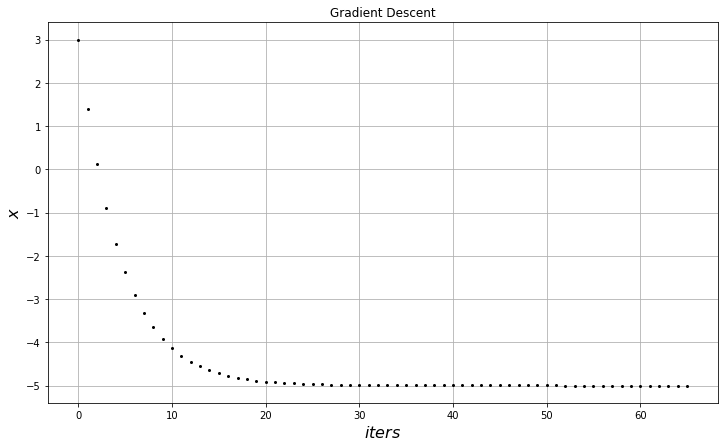

In [4]:
gradient_descent_plot(iters)

In [5]:
iters = gradient_descent_iterator(3, lambda x: 2 * (x + 5), learning_rate=0.01)

Iteration 0: x value is 3.000000.
Iteration 1: x value is 2.840000.
Iteration 2: x value is 2.683200.
Iteration 3: x value is 2.529536.
Iteration 4: x value is 2.378945.
Iteration 5: x value is 2.231366.
Iteration 6: x value is 2.086739.
Iteration 7: x value is 1.945004.
Iteration 8: x value is 1.806104.
Iteration 9: x value is 1.669982.
Iteration 10: x value is 1.536582.
Iteration 11: x value is 1.405851.
Iteration 12: x value is 1.277734.
Iteration 13: x value is 1.152179.
Iteration 14: x value is 1.029136.
Iteration 15: x value is 0.908553.
Iteration 16: x value is 0.790382.
Iteration 17: x value is 0.674574.
Iteration 18: x value is 0.561083.
Iteration 19: x value is 0.449861.
Iteration 20: x value is 0.340864.
Iteration 21: x value is 0.234046.
Iteration 22: x value is 0.129366.
Iteration 23: x value is 0.026778.
Iteration 24: x value is -0.073757.
Iteration 25: x value is -0.172282.
Iteration 26: x value is -0.268837.
Iteration 27: x value is -0.363460.
Iteration 28: x value is -

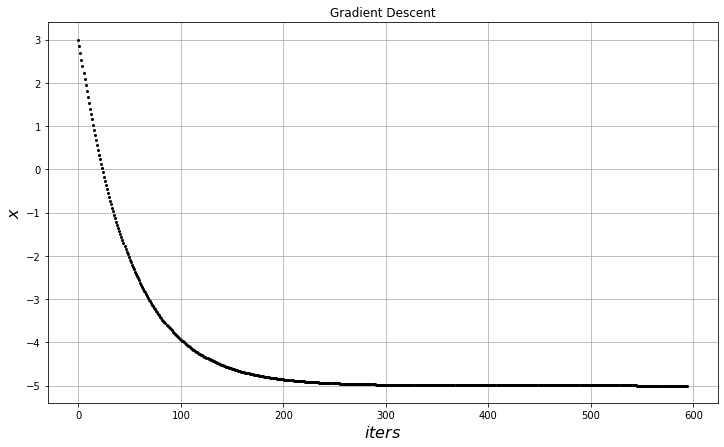

In [6]:
gradient_descent_plot(iters)

In [7]:
iters = gradient_descent_iterator(3, lambda x: 2 * (x + 5), learning_rate=0.001)

Iteration 0: x value is 3.000000.
Iteration 1: x value is 2.984000.
Iteration 2: x value is 2.968032.
Iteration 3: x value is 2.952096.
Iteration 4: x value is 2.936192.
Iteration 5: x value is 2.920319.
Iteration 6: x value is 2.904479.
Iteration 7: x value is 2.888670.
Iteration 8: x value is 2.872892.
Iteration 9: x value is 2.857147.
Iteration 10: x value is 2.841432.
Iteration 11: x value is 2.825749.
Iteration 12: x value is 2.810098.
Iteration 13: x value is 2.794478.
Iteration 14: x value is 2.778889.
Iteration 15: x value is 2.763331.
Iteration 16: x value is 2.747804.
Iteration 17: x value is 2.732309.
Iteration 18: x value is 2.716844.
Iteration 19: x value is 2.701410.
Iteration 20: x value is 2.686008.
Iteration 21: x value is 2.670636.
Iteration 22: x value is 2.655294.
Iteration 23: x value is 2.639984.
Iteration 24: x value is 2.624704.
Iteration 25: x value is 2.609454.
Iteration 26: x value is 2.594235.
Iteration 27: x value is 2.579047.
Iteration 28: x value is 2.563

Iteration 2285: x value is -4.917515.
Iteration 2286: x value is -4.917680.
Iteration 2287: x value is -4.917844.
Iteration 2288: x value is -4.918009.
Iteration 2289: x value is -4.918173.
Iteration 2290: x value is -4.918336.
Iteration 2291: x value is -4.918500.
Iteration 2292: x value is -4.918663.
Iteration 2293: x value is -4.918825.
Iteration 2294: x value is -4.918988.
Iteration 2295: x value is -4.919150.
Iteration 2296: x value is -4.919311.
Iteration 2297: x value is -4.919473.
Iteration 2298: x value is -4.919634.
Iteration 2299: x value is -4.919794.
Iteration 2300: x value is -4.919955.
Iteration 2301: x value is -4.920115.
Iteration 2302: x value is -4.920275.
Iteration 2303: x value is -4.920434.
Iteration 2304: x value is -4.920593.
Iteration 2305: x value is -4.920752.
Iteration 2306: x value is -4.920911.
Iteration 2307: x value is -4.921069.
Iteration 2308: x value is -4.921227.
Iteration 2309: x value is -4.921384.
Iteration 2310: x value is -4.921541.
Iteration 23

Iteration 4285: x value is -4.998495.
Iteration 4286: x value is -4.998498.
Iteration 4287: x value is -4.998501.
Iteration 4288: x value is -4.998504.
Iteration 4289: x value is -4.998507.
Iteration 4290: x value is -4.998510.
Iteration 4291: x value is -4.998513.
Iteration 4292: x value is -4.998516.
Iteration 4293: x value is -4.998519.
Iteration 4294: x value is -4.998522.
Iteration 4295: x value is -4.998525.
Iteration 4296: x value is -4.998528.
Iteration 4297: x value is -4.998531.
Iteration 4298: x value is -4.998534.
Iteration 4299: x value is -4.998537.
Iteration 4300: x value is -4.998540.
Iteration 4301: x value is -4.998543.
Iteration 4302: x value is -4.998546.
Iteration 4303: x value is -4.998549.
Iteration 4304: x value is -4.998551.
Iteration 4305: x value is -4.998554.
Iteration 4306: x value is -4.998557.
Iteration 4307: x value is -4.998560.
Iteration 4308: x value is -4.998563.
Iteration 4309: x value is -4.998566.
Iteration 4310: x value is -4.998569.
Iteration 43

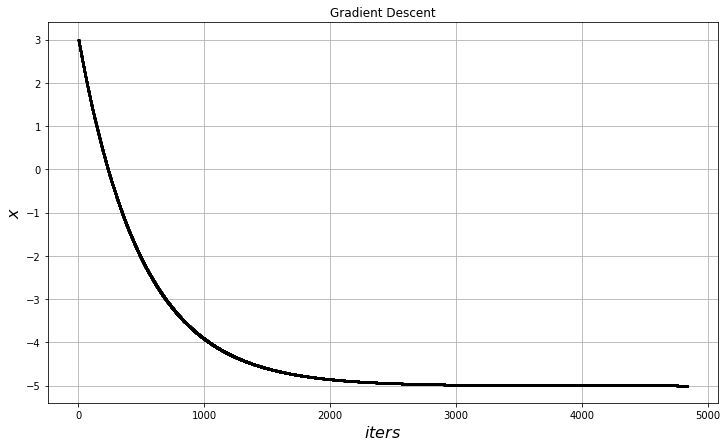

In [8]:
gradient_descent_plot(iters)

In [9]:
iters = gradient_descent_iterator(3, lambda x: 2 * (x + 5), learning_rate=0.0001)

Iteration 0: x value is 3.000000.
Iteration 1: x value is 2.998400.
Iteration 2: x value is 2.996800.
Iteration 3: x value is 2.995201.
Iteration 4: x value is 2.993602.
Iteration 5: x value is 2.992003.
Iteration 6: x value is 2.990405.
Iteration 7: x value is 2.988807.
Iteration 8: x value is 2.987209.
Iteration 9: x value is 2.985612.
Iteration 10: x value is 2.984014.
Iteration 11: x value is 2.982418.
Iteration 12: x value is 2.980821.
Iteration 13: x value is 2.979225.
Iteration 14: x value is 2.977629.
Iteration 15: x value is 2.976034.
Iteration 16: x value is 2.974438.
Iteration 17: x value is 2.972843.
Iteration 18: x value is 2.971249.
Iteration 19: x value is 2.969655.
Iteration 20: x value is 2.968061.
Iteration 21: x value is 2.966467.
Iteration 22: x value is 2.964874.
Iteration 23: x value is 2.963281.
Iteration 24: x value is 2.961688.
Iteration 25: x value is 2.960096.
Iteration 26: x value is 2.958504.
Iteration 27: x value is 2.956912.
Iteration 28: x value is 2.955

Iteration 1977: x value is 0.387072.
Iteration 1978: x value is 0.385995.
Iteration 1979: x value is 0.384917.
Iteration 1980: x value is 0.383840.
Iteration 1981: x value is 0.382764.
Iteration 1982: x value is 0.381687.
Iteration 1983: x value is 0.380611.
Iteration 1984: x value is 0.379535.
Iteration 1985: x value is 0.378459.
Iteration 1986: x value is 0.377383.
Iteration 1987: x value is 0.376307.
Iteration 1988: x value is 0.375232.
Iteration 1989: x value is 0.374157.
Iteration 1990: x value is 0.373082.
Iteration 1991: x value is 0.372008.
Iteration 1992: x value is 0.370933.
Iteration 1993: x value is 0.369859.
Iteration 1994: x value is 0.368785.
Iteration 1995: x value is 0.367711.
Iteration 1996: x value is 0.366638.
Iteration 1997: x value is 0.365565.
Iteration 1998: x value is 0.364491.
Iteration 1999: x value is 0.363419.
Iteration 2000: x value is 0.362346.
Iteration 2001: x value is 0.361273.
Iteration 2002: x value is 0.360201.
Iteration 2003: x value is 0.359129.
I

Iteration 3933: x value is -1.357163.
Iteration 3934: x value is -1.357891.
Iteration 3935: x value is -1.358620.
Iteration 3936: x value is -1.359348.
Iteration 3937: x value is -1.360076.
Iteration 3938: x value is -1.360804.
Iteration 3939: x value is -1.361532.
Iteration 3940: x value is -1.362260.
Iteration 3941: x value is -1.362987.
Iteration 3942: x value is -1.363715.
Iteration 3943: x value is -1.364442.
Iteration 3944: x value is -1.365169.
Iteration 3945: x value is -1.365896.
Iteration 3946: x value is -1.366623.
Iteration 3947: x value is -1.367349.
Iteration 3948: x value is -1.368076.
Iteration 3949: x value is -1.368802.
Iteration 3950: x value is -1.369528.
Iteration 3951: x value is -1.370255.
Iteration 3952: x value is -1.370981.
Iteration 3953: x value is -1.371706.
Iteration 3954: x value is -1.372432.
Iteration 3955: x value is -1.373158.
Iteration 3956: x value is -1.373883.
Iteration 3957: x value is -1.374608.
Iteration 3958: x value is -1.375333.
Iteration 39

Iteration 5932: x value is -2.557742.
Iteration 5933: x value is -2.558231.
Iteration 5934: x value is -2.558719.
Iteration 5935: x value is -2.559207.
Iteration 5936: x value is -2.559696.
Iteration 5937: x value is -2.560184.
Iteration 5938: x value is -2.560672.
Iteration 5939: x value is -2.561159.
Iteration 5940: x value is -2.561647.
Iteration 5941: x value is -2.562135.
Iteration 5942: x value is -2.562622.
Iteration 5943: x value is -2.563110.
Iteration 5944: x value is -2.563597.
Iteration 5945: x value is -2.564085.
Iteration 5946: x value is -2.564572.
Iteration 5947: x value is -2.565059.
Iteration 5948: x value is -2.565546.
Iteration 5949: x value is -2.566033.
Iteration 5950: x value is -2.566520.
Iteration 5951: x value is -2.567006.
Iteration 5952: x value is -2.567493.
Iteration 5953: x value is -2.567979.
Iteration 5954: x value is -2.568466.
Iteration 5955: x value is -2.568952.
Iteration 5956: x value is -2.569438.
Iteration 5957: x value is -2.569924.
Iteration 59

Iteration 7932: x value is -3.362971.
Iteration 7933: x value is -3.363299.
Iteration 7934: x value is -3.363626.
Iteration 7935: x value is -3.363953.
Iteration 7936: x value is -3.364280.
Iteration 7937: x value is -3.364608.
Iteration 7938: x value is -3.364935.
Iteration 7939: x value is -3.365262.
Iteration 7940: x value is -3.365589.
Iteration 7941: x value is -3.365916.
Iteration 7942: x value is -3.366242.
Iteration 7943: x value is -3.366569.
Iteration 7944: x value is -3.366896.
Iteration 7945: x value is -3.367222.
Iteration 7946: x value is -3.367549.
Iteration 7947: x value is -3.367875.
Iteration 7948: x value is -3.368202.
Iteration 7949: x value is -3.368528.
Iteration 7950: x value is -3.368855.
Iteration 7951: x value is -3.369181.
Iteration 7952: x value is -3.369507.
Iteration 7953: x value is -3.369833.
Iteration 7954: x value is -3.370159.
Iteration 7955: x value is -3.370485.
Iteration 7956: x value is -3.370811.
Iteration 7957: x value is -3.371137.
Iteration 79

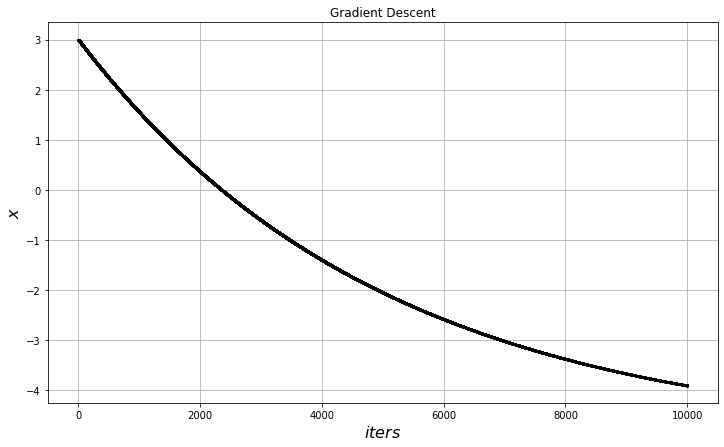

In [10]:
gradient_descent_plot(iters)